<h1 style="text-align: center;"> Football Match Probability Prediction </h1>

<h1 style="font-family:Serif; color:#d63031; font-size:27px; margin-bottom:0">Introduction</h1>
<p>
Football has been at the heart of data science for more than a decade. If today's algorithms focus on event detection, player style, or team analysis, predicting the results of a match stays an open challenge.</p>
<p>
Predicting the outcomes of a match between two teams depends mostly (but not only) on their current form. The form of a team can be viewed as their recent sequence of results versus the other teams. So match probabilities between two teams can be different given their calendar.</p>
<p>
This competition is about predicting the probabilities of more than 150000 match outcomes using the recent sequence of 10 matches of the teams.</p>

<h1 style="font-family:Serif; color:#d63031; font-size:27px; margin-bottom:0">I - Importing DATA : </h1>

### Importing required modules and libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

### Importing DATA

In [49]:
train = pd.read_csv("./Dataset/train.csv")
test = pd.read_csv("./Dataset/test.csv")
train_target_scores = pd.read_csv('./Dataset/train_target_and_scores.csv')

C:\Users\dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<h1 style="font-family:Serif; color:#d63031; font-size:27px; margin-bottom:0">II - Exploratory Data Analysis : </h1>

<h1 style="font-family:Serif; color:#0047AB; font-size:25px; margin-bottom:0; font-weight:bold;">1- Visualization & Understanding DATA </h1>

In [50]:
#The first 5 rows
train.head()

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,away,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,home,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


In [51]:
#Number of Rows & Columns
train.shape

(110938, 190)

In [52]:
#length and name of columns
train.columns

Index(['id', 'target', 'home_team_name', 'away_team_name', 'match_date',
       'league_name', 'league_id', 'is_cup', 'home_team_coach_id',
       'away_team_coach_id',
       ...
       'away_team_history_league_id_1', 'away_team_history_league_id_2',
       'away_team_history_league_id_3', 'away_team_history_league_id_4',
       'away_team_history_league_id_5', 'away_team_history_league_id_6',
       'away_team_history_league_id_7', 'away_team_history_league_id_8',
       'away_team_history_league_id_9', 'away_team_history_league_id_10'],
      dtype='object', length=190)

In [53]:
#DATA Types
train.dtypes.value_counts()

float64    162
object      26
int64        2
dtype: int64

<AxesSubplot:ylabel='None'>

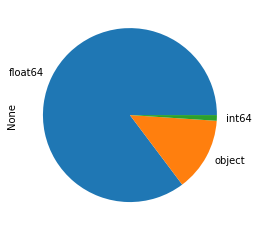

In [54]:
#Visualisation of Data Types
train.dtypes.value_counts().plot.pie()

In [55]:
train['target'].value_counts(normalize=True)

home    0.433693
away    0.317060
draw    0.249247
Name: target, dtype: float64

<AxesSubplot:ylabel='target'>

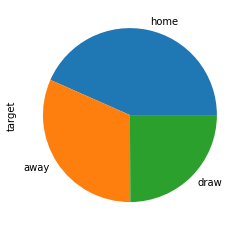

In [56]:
train['target'].value_counts(normalize=True).plot.pie()

In [57]:
train["home_team_name"].value_counts()

Al Ittihad          91
River Plate         71
Rangers             64
Liverpool           63
Al Ahli             62
                    ..
Atlético GO U20      1
Cray Valley (PM)     1
Worcester City       1
Velke Lovce          1
EB / Streymur II     1
Name: home_team_name, Length: 9813, dtype: int64

In [58]:
train["away_team_name"].value_counts()

Al Ittihad              82
River Plate             77
Liverpool               65
Rangers                 64
Al Ahli                 64
                        ..
Hlinsko                  1
Tatran Rakovnik          1
Makedonikos Foufas       1
Hohenstein-Ernstthal     1
Úlfarnir                 1
Name: away_team_name, Length: 9892, dtype: int64

<AxesSubplot:xlabel='home_team_name', ylabel='count'>

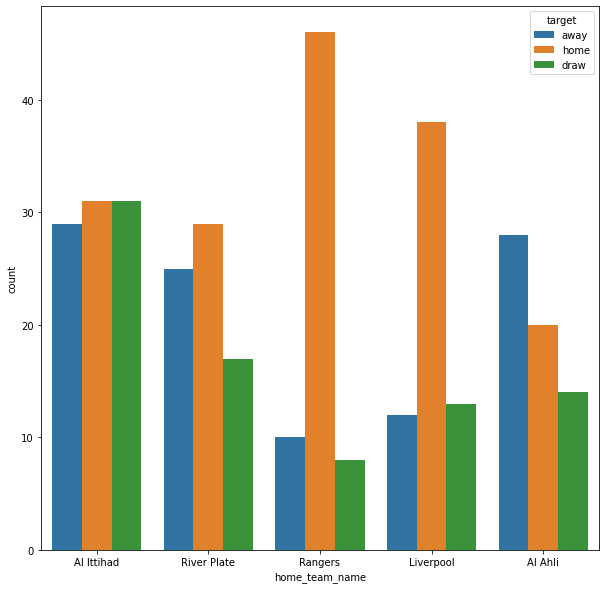

In [59]:
plt.figure(figsize=(10,10))
sns.countplot(x="home_team_name",hue="target",data=train,order=train.home_team_name.value_counts().iloc[:5].index)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_cup', ylabel='count'>

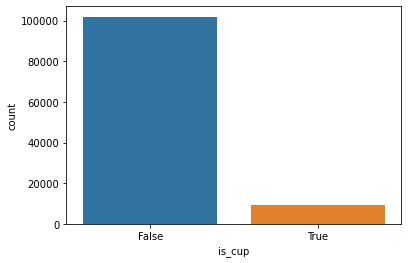

In [60]:
sns.countplot(train.is_cup)

<p>91% of matches are not cup matches</p>

In [61]:
pd.crosstab(train['is_cup'], train['target'])

target,away,draw,home
is_cup,,,
False,31931,25707,44218
True,3242,1944,3895


<h2 style="font-family:Serif; color:#0047AB; font-size:25px; margin-bottom:0; font-weight:bold;">2 - Missing values</h2>

<AxesSubplot:>

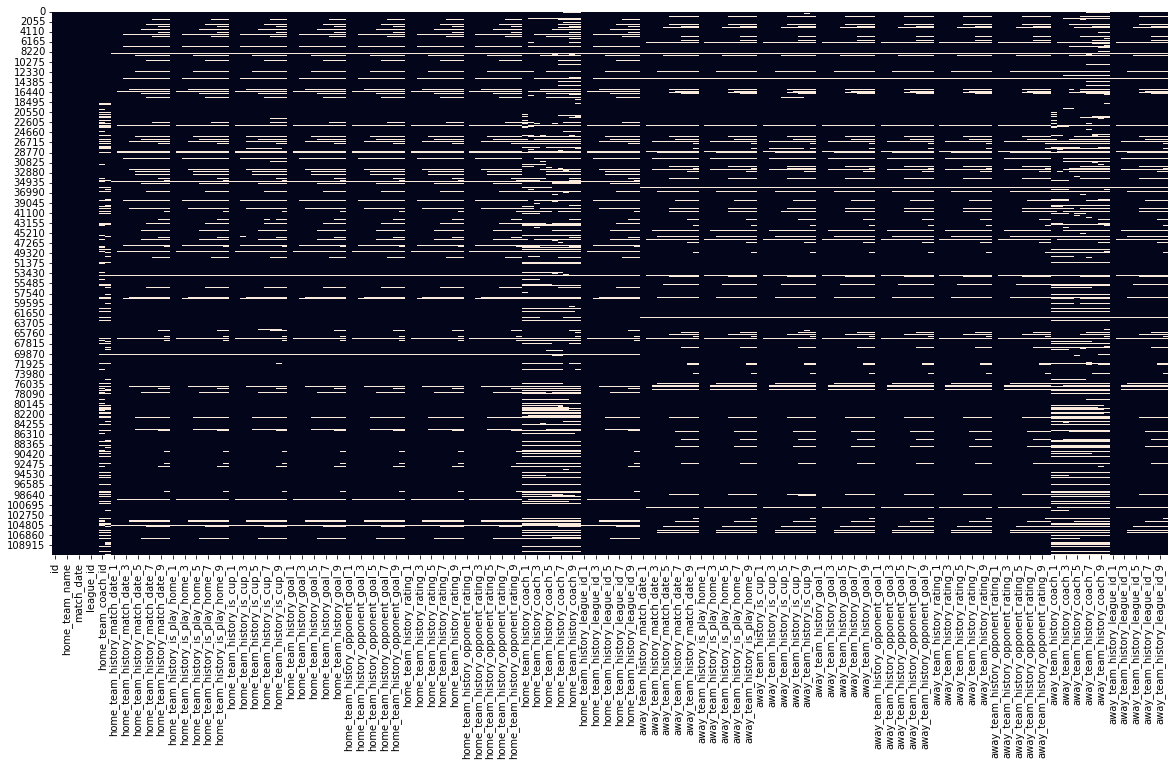

In [62]:
#Missing value of each column
plt.figure(figsize=(20,10))
sns.heatmap(train.isna(), cbar=False)

In [63]:
#percentage of missing vaulue on each column 
(train.isna().sum()/train.shape[0]).sort_values(ascending=False)

away_team_history_coach_10    0.244542
home_team_history_coach_10    0.240251
away_team_history_coach_9     0.235717
home_team_history_coach_9     0.231958
away_team_history_coach_8     0.227325
                                ...   
league_name                   0.000009
target                        0.000000
match_date                    0.000000
league_id                     0.000000
id                            0.000000
Length: 190, dtype: float64

In [64]:
#Sum of missing vaulue on each column
train.isnull().sum()

id                                    0
target                                0
home_team_name                        1
away_team_name                        1
match_date                            0
                                  ...  
away_team_history_league_id_6      8426
away_team_history_league_id_7      9867
away_team_history_league_id_8     11295
away_team_history_league_id_9     12762
away_team_history_league_id_10    14216
Length: 190, dtype: int64

<AxesSubplot:title={'center':'% of Values Missing'}>

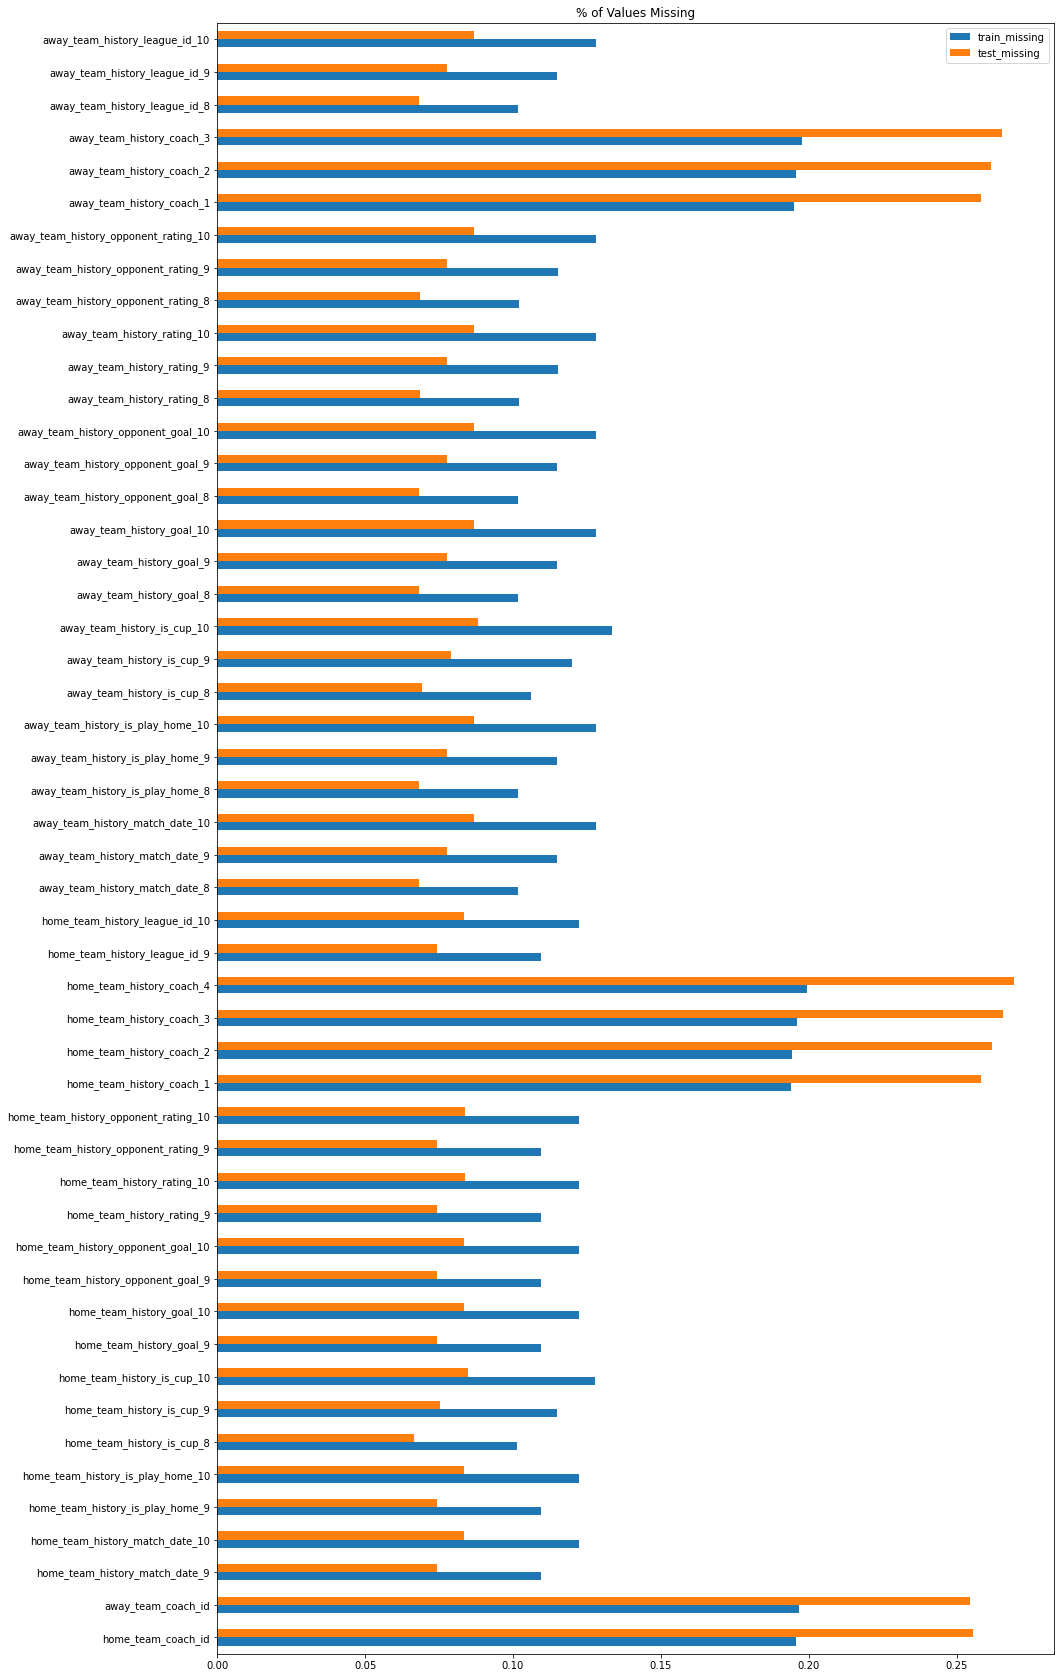

In [65]:
#visualisation of percentage of missing value on each column 
count_missing = pd.DataFrame([train.isna().mean(),test.isna().mean()]).T
count_missing = count_missing.rename(columns={0: "train_missing", 1: "test_missing"})
count_missing.query("train_missing > 0.1 and train_missing < 0.2").plot(kind="barh", figsize=(15, 30), title="% of Values Missing")

<h1 style="font-family:Serif; color:#d63031; font-size:27px; margin-bottom:0">III - Preprocessing Data : </h1>

<h2 style="font-family:Serif; color:#0047AB; font-size:25px; margin-bottom:0; font-weight:bold;">1 - Featured Engineering</h2>

In [66]:
#Missing ratio in train data
all_data_na = (train.isnull().sum() / len(train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
print(len(all_data_na))
missing_data.head(30)

30


,Missing Ratio
away_team_history_coach_10,24.454200
home_team_history_coach_10,24.025131
away_team_history_coach_9,23.571725
home_team_history_coach_9,23.195839
away_team_history_coach_8,22.732517
home_team_history_coach_8,22.417026
away_team_history_coach_7,21.973535
home_team_history_coach_7,21.615677
away_team_history_coach_6,21.205538
home_team_history_coach_6,20.964863


In [67]:
#Missing ratio in test data
all_data_na = (test.isnull().sum() / len(test)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
print(len(all_data_na))
missing_data.head(30)

30


,Missing Ratio
away_team_history_coach_10,29.278926
home_team_history_coach_10,29.239042
away_team_history_coach_9,28.877336
home_team_history_coach_9,28.875961
away_team_history_coach_8,28.507379
home_team_history_coach_8,28.472996
away_team_history_coach_7,28.125043
home_team_history_coach_7,28.108539
away_team_history_coach_6,27.749584
home_team_history_coach_6,27.711075


### Remove team_name & league_id & league_name  and coach  as they are not used.

In [68]:
train.drop(train.filter(regex='coach').columns, axis=1, inplace = True)
test.drop(test.filter(regex='coach').columns, axis=1, inplace = True)

#train = train.drop('league_id', axis=1)
#test = test.drop('league_id', axis=1)

### Replace dates (DATE-TIME) with number of days

In [69]:
for col in train.filter(regex='date', axis=1).columns:
     train[col] = pd.to_datetime(train[col])
     test[col] = pd.to_datetime(test[col])
    
# date based features
for i in range(1, 11):
     train[f'home_team_history_match_days_ago_{i}'] = (train['match_date'] - train[f'home_team_history_match_date_{i}']).dt.days
     test[f'home_team_history_match_days_ago_{i}'] = (test['match_date'] - test[f'home_team_history_match_date_{i}']).dt.days
     train[f'away_team_history_match_days_ago_{i}'] = (train['match_date'] - train[f'away_team_history_match_date_{i}']).dt.days
     test[f'away_team_history_match_days_ago_{i}'] = (test['match_date'] - test[f'away_team_history_match_date_{i}']).dt.days

In [70]:
for i in range(1, 11):
    train.drop(f'home_team_history_match_date_{i}', axis=1 , inplace=True)
    train.drop(f'away_team_history_match_date_{i}', axis=1 , inplace=True)
    test.drop(f'home_team_history_match_date_{i}', axis=1 , inplace=True)
    test.drop(f'away_team_history_match_date_{i}', axis=1 , inplace=True)

In [71]:
train = train.drop('match_date', axis=1)
test = test.drop('match_date', axis=1)

### Filling missing value : 

<p>

The missing information is as follows.

    ~ is_cup ==> ... fill with zero.
    ~ rating ==> ... fill with mean value.
    ~ is_play_home ==> ... fill with 0.5.
    ~ goal ==> ... fill with mean value.

 </p>

In [72]:
# is_cup
for col in train.filter(regex='is_cup', axis=1).columns:
    train[col] = train[col].fillna(0)
# rating
for col in train.filter(regex='rating', axis=1).columns:
    train[col] = train[col].fillna(train[col].mean())
# is play home
for col in train.filter(regex='is_play_home', axis=1).columns:
    train[col] = train[col].fillna(0.5)
# league
for col in train.filter(regex='league', axis=1).columns:
    train[col] = train[col].fillna(0)
# goal
for col in train.filter(regex='goal', axis=1).columns:
    train[col] = train[col].fillna(train[col].mean())
#days
for col in train.filter(regex='days', axis=1).columns:
    train[col] = train[col].fillna(train[col].mean())
    
# ------------------------------------------test------------------------------------------------

# is_cup
for col in test.filter(regex='is_cup', axis=1).columns:
    test[col] = test[col].fillna(0)
# rating
for col in test.filter(regex='rating', axis=1).columns:
    test[col] = test[col].fillna(test[col].mean())
# is play home
for col in test.filter(regex='is_play_home', axis=1).columns:
    test[col] = test[col].fillna(0.5)
# league
for col in test.filter(regex='league', axis=1).columns:
    test[col] = test[col].fillna(0)
# goal
for col in test.filter(regex='goal', axis=1).columns:
    test[col] = test[col].fillna(test[col].mean())
#days
for col in test.filter(regex='days', axis=1).columns:
    test[col] = test[col].fillna(test[col].mean())

In [73]:
all_data_na = (train.isnull().sum() / len(train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
print(len(all_data_na))
missing_data.head(30)

2


,Missing Ratio
home_team_name,0.000901
away_team_name,0.000901


In [74]:
#Find the row which there is a missing home_team_name
train[train['home_team_name'].isnull()]

,id,target,home_team_name,away_team_name,league_name,league_id,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,...,home_team_history_match_days_ago_6,away_team_history_match_days_ago_6,home_team_history_match_days_ago_7,away_team_history_match_days_ago_7,home_team_history_match_days_ago_8,away_team_history_match_days_ago_8,home_team_history_match_days_ago_9,away_team_history_match_days_ago_9,home_team_history_match_days_ago_10,away_team_history_match_days_ago_10
33562,16622092,away,NaN,NaN,0,1101,0,0.0,1.0,0.0,...,164.0,167.0,168.0,171.0,173.0,175.0,176.0,178.0,180.0,183.0


In [75]:
#drop it
train = train.drop([33562])

<p>Check the missing ratio :</p>

In [76]:
all_data_na = (train.isnull().sum() / len(train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
print(len(all_data_na))
missing_data.head(30)

0


,Missing Ratio


</br>
<p>No more missing values</p>

Here we replaced :
<ul>
<li>home_team_history_goal_{i} & away_team_history_goal_{i} ==>Column of sum of home_team_history_goal & away_team_history_goal </li>
<li>home_team_history_opponent_goal_{i} & away_team_history_opponent_goal_{i} ==>Column of sum of home_team_opponent_history_goal & away_team_opponent_history_goal </li>
<li>home_team_history_rating_{i} & away_team_history_rating_{i} ==>Column of sum of home_team_history_rating & away_team_history_rating </li>
<li> home_team_history_opponent_rating_{i} & away_team_history_opponent_rating_{i} ==>Column of sum of home_team_history_opponent_rating & away_team_history_opponent_rating </li>
<ul>

In [77]:
# Add Column of sum of home_team_history_goal & away_team_history_goal
train['home_team_history_goal']=train[['home_team_history_goal_1','home_team_history_goal_2','home_team_history_goal_3','home_team_history_goal_4','home_team_history_goal_5','home_team_history_goal_6','home_team_history_goal_7','home_team_history_goal_8','home_team_history_goal_9','home_team_history_goal_10']].sum(axis=1)
train['away_team_history_goal']=train[['away_team_history_goal_1','away_team_history_goal_2','away_team_history_goal_3','away_team_history_goal_4','away_team_history_goal_5','away_team_history_goal_6','away_team_history_goal_7','away_team_history_goal_8','away_team_history_goal_9','away_team_history_goal_10']].sum(axis=1)
# Add Column of sum of home_team_opponent_history_goal & away_team_opponent_history_goal
train['home_team_history_opponent_goal']=train[['home_team_history_opponent_goal_1','home_team_history_opponent_goal_2','home_team_history_opponent_goal_3','home_team_history_opponent_goal_4','home_team_history_opponent_goal_5','home_team_history_opponent_goal_6','home_team_history_opponent_goal_7','home_team_history_opponent_goal_8','home_team_history_opponent_goal_9','home_team_history_opponent_goal_10']].sum(axis=1)
train['away_team_history_opponent_goal']=train[['away_team_history_opponent_goal_1','away_team_history_opponent_goal_2','away_team_history_opponent_goal_3','away_team_history_opponent_goal_4','away_team_history_opponent_goal_5','away_team_history_opponent_goal_6','away_team_history_opponent_goal_7','away_team_history_opponent_goal_8','away_team_history_opponent_goal_9','away_team_history_opponent_goal_10']].sum(axis=1)
# Add Column of sum of home_team_history_rating & away_team_history_rating
train['home_team_history_rating']=train[['home_team_history_rating_1','home_team_history_rating_2','home_team_history_rating_3','home_team_history_rating_4','home_team_history_rating_5','home_team_history_rating_6','home_team_history_rating_7','home_team_history_rating_8','home_team_history_rating_9','home_team_history_rating_10']].mean(axis=1)
train['away_team_history_rating']=train[['away_team_history_rating_1','away_team_history_rating_2','away_team_history_rating_3','away_team_history_rating_4','away_team_history_rating_5','away_team_history_rating_6','away_team_history_rating_7','away_team_history_rating_8','away_team_history_rating_9','away_team_history_rating_10']].mean(axis=1)
# Add Column of sum of home_team_history_opponent_rating & away_team_history_opponent_rating
train['home_team_history_opponent_rating']=train[['home_team_history_opponent_rating_1','home_team_history_opponent_rating_2','home_team_history_opponent_rating_3','home_team_history_opponent_rating_4','home_team_history_opponent_rating_5','home_team_history_opponent_rating_6','home_team_history_opponent_rating_7','home_team_history_opponent_rating_8','home_team_history_opponent_rating_9','home_team_history_opponent_rating_10']].mean(axis=1)
train['away_team_history_opponent_rating']=train[['away_team_history_opponent_rating_1','away_team_history_opponent_rating_2','away_team_history_opponent_rating_3','away_team_history_opponent_rating_4','away_team_history_opponent_rating_5','away_team_history_opponent_rating_6','away_team_history_opponent_rating_7','away_team_history_opponent_rating_8','away_team_history_opponent_rating_9','away_team_history_opponent_rating_10']].mean(axis=1)


# Delete Columns 
for i in range(1,11):
    del train[f"home_team_history_goal_{i}"]
    del train[f"away_team_history_goal_{i}"]
    del train[f"home_team_history_opponent_goal_{i}"]
    del train[f"away_team_history_opponent_goal_{i}"]
    del train[f"home_team_history_rating_{i}"]
    del train[f"away_team_history_rating_{i}"]
    del train[f"home_team_history_opponent_rating_{i}"]
    del train[f"away_team_history_opponent_rating_{i}"]
    
train  

,id,target,home_team_name,away_team_name,league_name,league_id,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,...,home_team_history_match_days_ago_10,away_team_history_match_days_ago_10,home_team_history_goal,away_team_history_goal,home_team_history_opponent_goal,away_team_history_opponent_goal,home_team_history_rating,away_team_history_rating,home_team_history_opponent_rating,away_team_history_opponent_rating
0,11906497,away,Newell's Old Boys,River Plate,Superliga,636,False,0.0,1.0,0.0,...,90.0,60.0,13.0,16.0,10.0,9.0,5.496371,8.561214,4.400204,3.808902
1,11984383,home,Real Estelí,Deportivo Las Sabanas,Primera Division,752,False,1.0,0.0,1.0,...,62.0,77.0,9.0,8.0,10.0,14.0,8.440839,5.287316,4.546772,6.822376
2,11983301,draw,UPNFM,Marathón,Liga Nacional,734,False,0.0,1.0,0.0,...,73.0,73.0,19.0,21.0,17.0,11.0,6.844712,7.620071,5.547477,5.188232
3,11983471,away,León,Morelia,Liga MX,743,False,0.0,0.0,1.0,...,66.0,65.0,18.0,24.0,13.0,20.0,7.449923,5.818128,4.983015,6.469250
4,11883005,home,Cobán Imperial,Iztapa,Liga Nacional,705,False,0.0,1.0,0.0,...,63.0,62.0,18.0,18.0,14.0,10.0,7.079634,5.983338,5.192975,6.027979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110933,18030016,draw,Zamora Fútbol Club,Hermanos Colmenares,Primera Division,800,False,0.0,1.0,0.0,...,166.0,157.0,17.0,17.0,9.0,14.0,6.475353,5.361246,4.686841,6.517974
110934,18030096,away,Royal Pari,Oriente Petrolero,Liga De Futbol Prof,1098,False,0.0,1.0,0.0,...,124.0,129.0,26.0,13.0,14.0,17.0,8.142437,6.175490,6.962505,8.843194
110935,17715497,draw,São Bernardo,Água Santa,Paulista A2,1314,False,0.0,0.0,1.0,...,139.0,145.0,10.0,12.0,11.0,2.0,5.836659,6.499731,4.690324,4.335393
110936,17944153,away,Everton,La Serena,Primera Division,663,False,0.0,1.0,0.0,...,106.0,102.0,10.0,7.0,14.0,7.0,5.764963,5.069059,5.605793,5.918087


<br>
<p>Same for test data</p>
<br>

In [78]:
# Add Column of sum of home_team_history_goal & away_team_history_goal
test['home_team_history_goal']=test[['home_team_history_goal_1','home_team_history_goal_2','home_team_history_goal_3','home_team_history_goal_4','home_team_history_goal_5','home_team_history_goal_6','home_team_history_goal_7','home_team_history_goal_8','home_team_history_goal_9','home_team_history_goal_10']].sum(axis=1)
test['away_team_history_goal']=test[['away_team_history_goal_1','away_team_history_goal_2','away_team_history_goal_3','away_team_history_goal_4','away_team_history_goal_5','away_team_history_goal_6','away_team_history_goal_7','away_team_history_goal_8','away_team_history_goal_9','away_team_history_goal_10']].sum(axis=1)
# Add Column of sum of home_team_opponent_history_goal & away_team_opponent_history_goal
test['home_team_history_opponent_goal']=test[['home_team_history_opponent_goal_1','home_team_history_opponent_goal_2','home_team_history_opponent_goal_3','home_team_history_opponent_goal_4','home_team_history_opponent_goal_5','home_team_history_opponent_goal_6','home_team_history_opponent_goal_7','home_team_history_opponent_goal_8','home_team_history_opponent_goal_9','home_team_history_opponent_goal_10']].sum(axis=1)
test['away_team_history_opponent_goal']=test[['away_team_history_opponent_goal_1','away_team_history_opponent_goal_2','away_team_history_opponent_goal_3','away_team_history_opponent_goal_4','away_team_history_opponent_goal_5','away_team_history_opponent_goal_6','away_team_history_opponent_goal_7','away_team_history_opponent_goal_8','away_team_history_opponent_goal_9','away_team_history_opponent_goal_10']].sum(axis=1)
# Add Column of sum of home_team_history_rating & away_team_history_rating
test['home_team_history_rating']=test[['home_team_history_rating_1','home_team_history_rating_2','home_team_history_rating_3','home_team_history_rating_4','home_team_history_rating_5','home_team_history_rating_6','home_team_history_rating_7','home_team_history_rating_8','home_team_history_rating_9','home_team_history_rating_10']].mean(axis=1)
test['away_team_history_rating']=test[['away_team_history_rating_1','away_team_history_rating_2','away_team_history_rating_3','away_team_history_rating_4','away_team_history_rating_5','away_team_history_rating_6','away_team_history_rating_7','away_team_history_rating_8','away_team_history_rating_9','away_team_history_rating_10']].mean(axis=1)
# Add Column of sum of home_team_history_opponent_rating & away_team_history_opponent_rating
test['home_team_history_opponent_rating']=test[['home_team_history_opponent_rating_1','home_team_history_opponent_rating_2','home_team_history_opponent_rating_3','home_team_history_opponent_rating_4','home_team_history_opponent_rating_5','home_team_history_opponent_rating_6','home_team_history_opponent_rating_7','home_team_history_opponent_rating_8','home_team_history_opponent_rating_9','home_team_history_opponent_rating_10']].mean(axis=1)
test['away_team_history_opponent_rating']=test[['away_team_history_opponent_rating_1','away_team_history_opponent_rating_2','away_team_history_opponent_rating_3','away_team_history_opponent_rating_4','away_team_history_opponent_rating_5','away_team_history_opponent_rating_6','away_team_history_opponent_rating_7','away_team_history_opponent_rating_8','away_team_history_opponent_rating_9','away_team_history_opponent_rating_10']].mean(axis=1)


# Delete Columns 
for i in range(1,11):
    del test[f"home_team_history_goal_{i}"]
    del test[f"away_team_history_goal_{i}"]
    del test[f"home_team_history_opponent_goal_{i}"]
    del test[f"away_team_history_opponent_goal_{i}"]
    del test[f"home_team_history_rating_{i}"]
    del test[f"away_team_history_rating_{i}"]
    del test[f"home_team_history_opponent_rating_{i}"]
    del test[f"away_team_history_opponent_rating_{i}"]
    
test  

,id,home_team_name,away_team_name,league_name,league_id,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,...,home_team_history_match_days_ago_10,away_team_history_match_days_ago_10,home_team_history_goal,away_team_history_goal,home_team_history_opponent_goal,away_team_history_opponent_goal,home_team_history_rating,away_team_history_rating,home_team_history_opponent_rating,away_team_history_opponent_rating
0,17761448,12 de Octubre,Sportivo Luqueño,Division 1,755,False,0.0,0.0,1.0,1.0,...,48.0,70.0,10.0,11.0,6.0,14.0,4.570763,4.811870,7.408696,6.221093
1,17695487,Necaxa,Atlas,Liga MX,743,False,0.0,1.0,1.0,0.0,...,69.0,68.0,7.0,10.0,14.0,10.0,5.203757,5.885441,6.435353,5.629701
2,17715496,Sertãozinho,EC São Bernardo,Paulista A2,1314,False,1.0,0.0,1.0,0.0,...,247.0,168.0,8.0,6.0,14.0,15.0,4.474860,4.835428,6.684485,6.317987
3,17715493,RB Brasil,XV de Piracicaba,Paulista A2,1314,False,0.0,0.0,1.0,0.0,...,248.0,138.0,8.0,11.0,16.0,8.0,4.561036,6.809434,6.706340,4.405098
4,17715492,Taubaté,Monte Azul,Paulista A2,1314,False,0.0,0.0,1.0,0.0,...,234.0,238.0,9.0,6.0,12.0,9.0,5.102046,4.377685,5.986625,6.635796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72706,18450246,Cerro,Defensor Sporting,Segunda Division,776,False,1.0,0.0,1.0,0.0,...,68.0,68.0,13.0,15.0,8.0,9.0,5.893499,6.661582,4.907744,4.596630
72707,18164889,Boca Juniors,Newell's Old Boys,Superliga,636,False,0.0,1.0,0.0,1.0,...,58.0,63.0,16.0,8.0,9.0,11.0,6.336037,5.484650,4.602886,5.567140
72708,18449018,Mexico W,Canada W,Friendly International Women,1363,False,1.0,1.0,0.0,0.0,...,629.0,172.0,12.0,12.0,18.0,5.0,5.920656,8.028838,10.551035,5.826094
72709,17958831,Flamengo,Ceará,Serie A,648,False,0.0,0.0,0.0,1.0,...,31.0,41.0,20.0,14.0,8.0,8.0,7.665525,5.080228,4.475615,5.094133


In [79]:
# Delete Columns history_league_id_{i} 
for i in range(1,11):
    del train[f"home_team_history_league_id_{i}"]
    del train[f"away_team_history_league_id_{i}"]
    del test[f"home_team_history_league_id_{i}"]
    del test[f"away_team_history_league_id_{i}"]

In [80]:
del test['home_team_name']
del test['away_team_name']
del test['league_name']


del train['home_team_name']
del train['away_team_name']
del train['league_name']


In [81]:
test.shape

(72711, 71)

## Encoding Data

Target :
<ul>
    <li> home ==> 0 </li>
        <li> draw ==> 1 </li>
            <li> away ==> 2 </li>
</ul>
is_cup :
<ul>
    <li> FALSE ==> 0 </li>
        <li> TRUE ==> 1 </li>
</ul>

In [82]:
train['target'] = train_target_scores['target'].map({'home': 0, 'draw': 1, 'away': 2})
test['target'] = train_target_scores['target'].map({'home': 0, 'draw': 1, 'away': 2})

In [83]:
train['is_cup'] = train['is_cup'].map({False: 0, True: 1})
test['is_cup'] = test['is_cup'].map({False: 0, True: 1})

<h1 style="font-family:Serif; color:#d63031; font-size:27px; margin-bottom:0">VI - Make a Model : </h1>

In [84]:
# Import required Modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [85]:
def preprocessing(train):
    
    rating_features = ['is_cup','home_team_history_goal','away_team_history_goal','home_team_history_opponent_goal','away_team_history_opponent_goal','home_team_history_rating','away_team_history_rating', 'home_team_history_opponent_rating','away_team_history_opponent_rating']

    #Make X and y
    X = train[rating_features]
    y = train['target']
    
    print(y.value_counts())
    
    return X, y

In [86]:
X_train, y_train = preprocessing(train)

0    48113
2    35173
1    27651
Name: target, dtype: int64


In [87]:
X__test, y__test = preprocessing(test)

0    31932
2    23202
1    17577
Name: target, dtype: int64


### Logistic Regression 

In [88]:
# Creating and training our model

model = LogisticRegression(C=0.001,penalty='l2',solver='lbfgs', max_iter=500)


In [89]:
#Fit the model
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X__test)
    
    print(confusion_matrix(y__test, ypred))
    print(classification_report(y__test, ypred))

In [90]:
#Evaluate the model
evaluation(model)

[[22049    68  9815]
 [12209    53  5315]
 [16054    54  7094]]
              precision    recall  f1-score   support

           0       0.44      0.69      0.54     31932
           1       0.30      0.00      0.01     17577
           2       0.32      0.31      0.31     23202

    accuracy                           0.40     72711
   macro avg       0.35      0.33      0.28     72711
weighted avg       0.37      0.40      0.34     72711



## Making prediction

In [91]:
prediction = model.predict_proba(X__test)
prediction

array([[0.41063027, 0.30796123, 0.2814085 ],
       [0.34278455, 0.30135542, 0.35586002],
       [0.4133591 , 0.29931207, 0.28732884],
       ...,
       [0.18238319, 0.21583015, 0.60178666],
       [0.54571388, 0.26328574, 0.19100038],
       [0.38435401, 0.28487775, 0.33076823]])

In [92]:
df_sub = pd.DataFrame({
    'id': test['id'],
    'home': prediction[:, 0],
    'draw': prediction[:, 1],
    'away': prediction[:, 2]
    
})
df_sub

,id,home,draw,away
0,17761448,0.410630,0.307961,0.281409
1,17695487,0.342785,0.301355,0.355860
2,17715496,0.413359,0.299312,0.287329
3,17715493,0.241452,0.296280,0.462267
4,17715492,0.453754,0.301741,0.244505
...,...,...,...,...
72706,18450246,0.383438,0.308392,0.308170
72707,18164889,0.523796,0.275721,0.200483
72708,18449018,0.182383,0.215830,0.601787
72709,17958831,0.545714,0.263286,0.191000


<AxesSubplot:ylabel='Frequency'>

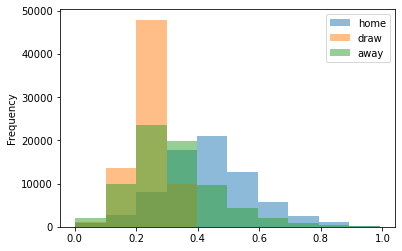

In [93]:
df_sub.iloc[:, 1:].plot.hist(alpha=0.5)

<h1 style="font-family:Serif; color:#d63031; font-size:27px; margin-bottom:0">V - Submit prediction : </h1>

In [94]:
df_sub[['id', 'home', 'away', 'draw']].to_csv('submission.csv', index=False)
df_sub.head()

,id,home,draw,away
0,17761448,0.410630,0.307961,0.281409
1,17695487,0.342785,0.301355,0.355860
2,17715496,0.413359,0.299312,0.287329
3,17715493,0.241452,0.296280,0.462267
4,17715492,0.453754,0.301741,0.244505
